# Pcygni-Profile Calculator Tool Tutorial

This brief tutorial should give you a basic overview of the main features and capabilities of the Python P-Cygni Line profile calculator, which is based on the Elementary Supernova Model (ES) of Jefferey and Branch 1990.

## Installation

### Obtaining the tool

Head over to github and either clone my repository (https://github.com/unoebauer/public-astro-tools) or download the Python file directly.

### Requisites 

* python 2.7 and following packages
    * numpy
    * scipy
    * astropy
    * matplotlib
* (recommended) ipython

These are all standard Python packages and you should be able to install these with the package manager of your favourite distribution. Alternatively, you can use Anaconda/Miniconda. For this, you can use the requirements file shipped with the github repository:

```
conda-env create -f pcygni_env.yml
```

### (Optional) Running this tutorial as a jupyter notebook

If you want to interactively use this jupyter notebook, you have to install [jupyter](http://jupyter.org/) as well (it is part of the requirements file and will be installed automatically when setting up the anaconda environment). Then you can start this notebook with:

```
jupyter notebook pcygni_tutorial.ipnb
```

## Basic usage

The following Python code snippets demonstrate the basic use of the tool. Just execute the following lines in an python/ipython (preferable) shell in the directory in which the Python tool is located:

In [1]:
import matplotlib.pyplot as plt

/home/ulrich/miniconda2/envs/pcygni/lib/python2.7/site-packages/matplotlib/__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


Import the line profile calculator module

In [2]:
import pcygni_profile as pcp

Create an instance of the Line Calculator, for now with the default parameters (check the source code for the default parameters)

In [3]:
profcalc = pcp.PcygniCalculator()

Calculate and illustrate line profile

In [4]:
fig = profcalc.show_line_profile()

/home/ulrich/miniconda2/envs/pcygni/lib/python2.7/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


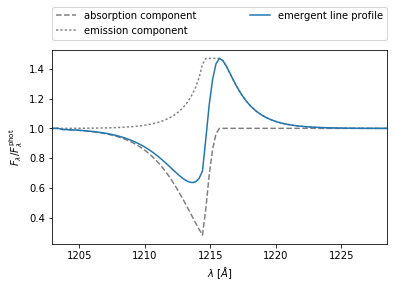

In [5]:
plt.show()

## Advanced Uses

In the remaining part of this tutorial, we have a close look at the line calculator and investigate a few phenomena in more detail. As a preparation, we import astropy

In [6]:
import astropy.units as units

In [7]:
import astropy.constants as csts

Now, we have a look at the parameters of the line profile calculator. The following code line just shows all keyword arguments of the calculator and their default values:

In [8]:
tmp = pcp.PcygniCalculator(t=3000 * units.s, vmax=0.01 * csts.c, vphot=0.001 * csts.c, tauref=1, 
                           vref=5e7 * units.cm/units.s, ve=5e7 * units.cm/units.s, 
                           lam0=1215.7 * units.AA, vdet_min=None, vdet_max=None)

* ``t``: time since explosion (default 3000 secs)
* ``vmax``: velocity at the outer ejecta edge (with t, can be turned into r) (1% c)
* ``vphot``: velocity, i.e. location, of the photosphere (0.1% c)
* ``vref``: reference velocity, used in the density law (500 km/s)
* ``ve``: another parameter for the density law (500 km/s)
* ``tauref``: reference optical depth of the line transition (at vref) (1)
* ``lam0``: rest frame natural wavelength of the line transition (1215.7 Angstrom)
* ``vdet_min``: inner location of the detached line-formation shell; if None, will be set to vphot (None)
* ``vdet_max``: outer location of the detached line-formation shell; if None, will be set to vmax (None)

**Note** that you have to supply astropy quantities (i.e. numbers with units) for all these parameters (except for the reference optical depth).

### Varying the Line Strength - Line Saturation

To start, we investigate the effect of increasing the line strength. 

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
for t in [1, 10, 100, 1000, 10000]:
    tmp = pcp.PcygniCalculator(tauref=t)
    x, y = tmp.calc_profile_Flam(npoints=500)
    ax.plot(x.to("AA"), y, label=r"$\tau_{{\mathrm{{ref}}}} = {:f}$".format(t))
ax.set_xlabel(r"$\lambda$ [$\mathrm{\AA}$]")    
ax.set_ylabel(r"$F_{\lambda}/F^{\mathrm{phot}}_{\lambda}$")
ax.legend()

/home/ulrich/miniconda2/envs/pcygni/lib/python2.7/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  warnings.warn(msg, IntegrationWarning)


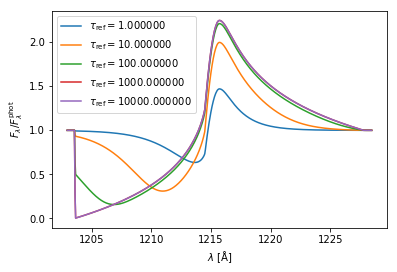

In [10]:
plt.show()

The stronger the line, the deeper the absorption throughs and stronger the emission peak becomes. At a certain point, the line "staurates", i.e the profile does not become more prominent with increasing line strength, since all photons are already scatterd.

### Increasing the ejecta size

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
vmax = 0.01 * csts.c
for v in [0.5 * vmax, vmax, 2 * vmax]:
    tmp = pcp.PcygniCalculator(tauref=1000, vmax=v)
    x, y = tmp.calc_profile_Flam(npoints=500)
    ax.plot(x.to("AA"), y, label=r"$v_{{\mathrm{{max}}}} = {:f}\,c$".format((v / csts.c).to("")))
ax.set_xlabel(r"$\lambda$ [$\mathrm{\AA}$]")
ax.set_ylabel(r"$F_{\lambda} / F^{\mathrm{phot}}_{\lambda}$")
ax.legend()

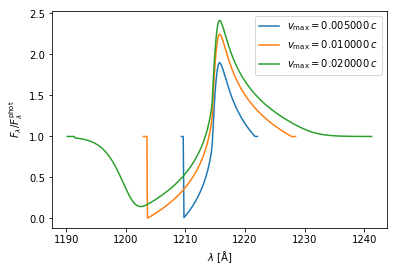

In [12]:
plt.show()

### Changing the size of the photosphere

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
vphot = 0.001 * csts.c
for v in [0.5 * vphot, vphot, 2 * vphot]:
    tmp = pcp.PcygniCalculator(tauref=1000, vphot=v)
    x, y = tmp.calc_profile_Flam(npoints=500)
    ax.plot(x.to("AA"), y, label=r"$v_{{\mathrm{{phot}}}} = {:f}\,c$".format((v / csts.c).to("")))
ax.set_xlabel(r"$\lambda$ [$\mathrm{\AA}$]")
ax.set_ylabel(r"$F_{\lambda} / F^{\mathrm{phot}}_{\lambda}$")
ax.legend()

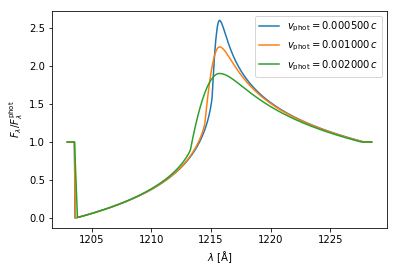

In [14]:
plt.show()

### Detaching the line forming region from the photosphere

Finally, we investigate what happens when the line does not form throughout the entire envelope but only in a detached shell within the ejecta.

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)

tmp = pcp.PcygniCalculator(tauref=1000)
x, y = tmp.calc_profile_Flam(npoints=500)
ax.plot(x.to("AA"), y, label=r"no detached line-formation shell")

tmp = pcp.PcygniCalculator(tauref=1000, vdet_min=0.0025 * csts.c, vdet_max=0.0075 * csts.c)
x, y = tmp.calc_profile_Flam(npoints=500)
ax.plot(x.to("AA"), y, label=r"detached line-formation shell")

ax.set_xlabel(r"$\lambda$ [$\mathrm{\AA}$]")
ax.set_ylabel(r"$F_{\lambda} / F^{\mathrm{phot}}_{\lambda}$")
ax.legend()

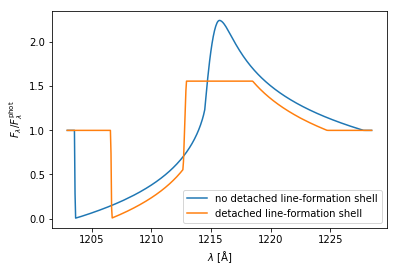

In [16]:
plt.show()

The detachment of the line-formation region leads to a "flat-top" line profile.